# Классификация (Classification)

## Загрузка данных Iris Dataset
Iris dataset - это набор данных, содержащий информацию об измерениях трех видов ирисов (растений): Iris setosa, Iris virginica и Iris versicolor. Он состоит из 150 экземпляров ирисов, каждый из которых имеет четыре характеристики: длину и ширину чашелистика (sepal length, sepal width) и лепестков (petal length, petal width).

In [20]:
from sklearn.datasets import load_iris

# загрузка данных iris dataset
iris = load_iris()
# данные загружаются в виде объектов класса Bunch
type(iris)

sklearn.utils._bunch.Bunch

Объект класса `Bunch` похож на словарь и к содержимому можно получить доступ по ключам. Посмотрим на список доступных ключей при помощи метода `keys()`:

In [21]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Посмотрим содержимое объекта по ключу `'target'`. Здесь находятся метки всех объектов. Область значений меток {0, 1, 2}. Значит всего имеется 3 класса.

In [22]:
iris['data'].shape

(150, 4)

In [23]:
iris['data'][:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [24]:
iris['target'].shape

(150,)

In [25]:
iris['target']      # также можно записать data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Посмотрим на названия меток (классов) по ключу `'target_names'`

In [26]:
# названия меток
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Очевидно, что в нашем наборе данных сначала идут образцы 'setosa', затем 'versicolor' и 'virginica'. Теперь взглянем на названия нецелевых признаков, обратившись по ключу `'feature_names'`.

In [27]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<img src="https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png">

Сам же массив, содержащий данные признаков для всех образцов доступен по ключу `'data'`. Выведем на печать первые 5 строк. 

In [28]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Извлечем данные признаков и меток в переменные `X` и `y`:

In [29]:
X = iris['data']
y = iris['target']

In [30]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

## Бинарная классификация (Binary Classification)
В общем случае задача заключается в построении модели, способной классифицировать образцы ирисов на три класса, по заданным четырем признакам. Но для начала мы упростим задачу. Модель должна будет производить бинарную классификацию: разбивать образцы всего на два класса - "virginica" и "not verginica". Первый класс будем называть <span style="color: green"> "положительным"</span> $\oplus$, а второй - <span style="color: orange">"отрицательным" </span> $\ominus$. Создадим для этого новый массив меток, который будет содержать значения `1` для образцов положительного класса, т.е. для ирисов вида virginica и `-1` для образцов отрицательного класса, т.е. для остальных ирисов.

In [31]:
import numpy as np

# метки для бинарной классификации:

y_virg = np.ones_like(y)
for i in range(len(y)):
    if y[i] < 2:
        y_virg[i] = -1
# y_virg = (y == 2)
y_virg

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Также для наглядной визуализации пространства признаков, мы будем использовать всего два признака: 'sepal width' и 'petal lenght', которые представлены в колонках с индексами `1` и `2` массива признаков `X`. Конечно, игнорирование других признаков снизит качество классификации, но мы все же поэкспериментируем, чтобы получить интересные картинки. Создадим переменную `X_reduced` в которой будут данные только интересующих нас сейчас признаков:

In [32]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [33]:
X_reduced = X[:, (1, 2)]
X_reduced[:5]

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4]])

### Визуализация данных

Визуализируем данные в пространстве признаков. Зелеными точками отображены образцы положительного класса, оранжевыми - образцы отрицательного класса.

In [34]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'petal lenght')

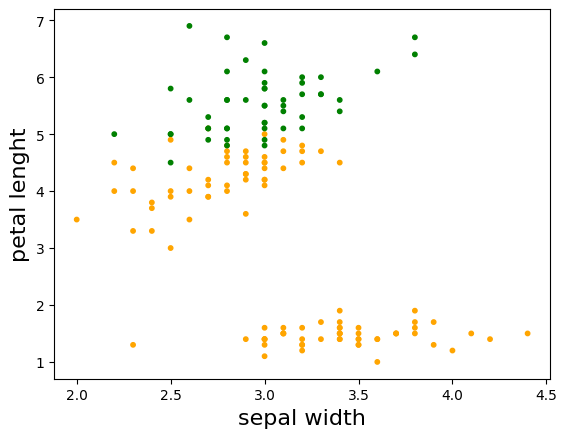

In [35]:
# первый способ, создать карту цветов для образцов
colors = []
for i in range(len(y_virg)):
    color = "green" if y_virg[i] else "orange"
    colors.append(color)

# эквивалентная запись (list comprehension):
colors = ["green" if y_virg[i]==1 else "orange" for i in range(len(y_virg))]

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors, s=10)
plt.xlabel("sepal width", fontsize=16)
plt.ylabel("petal lenght", fontsize=16)

Text(0, 0.5, 'petal lenght')

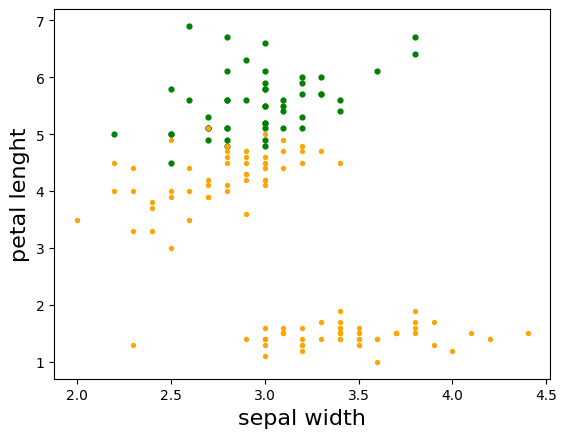

In [36]:
# второй способ по-отдельности визуализировать объекты разных классов
X_virginica = X_reduced[y_virg==1]         # образцы класса virginica
X_not_virginica = X_reduced[y_virg==-1]    # образцы класса not verginica

plt.scatter(X_virginica[:, 0], X_virginica[:, 1], c="green", s=12)
plt.scatter(X_not_virginica[:, 0], X_not_virginica[:, 1], c="orange", s=8)

plt.xlabel("sepal width", fontsize=16)
plt.ylabel("petal lenght", fontsize=16)

### Разбиение на тренировочную и тестовую выборки

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_virg,
                                                    test_size=0.2,
                                                    random_state=40)
X_train.shape, y_train.shape

((120, 2), (120,))

### Обучение линейной модели бинарной классификации
Воспользуемся моделью линейного классификатора, который производит классификацию разбивая пространство признаков на две области при помощи прямой (если признаков всего два), плоскости (если признаков три) и тд.

In [38]:
X_train[:5]

array([[2.2, 4. ],
       [3.3, 1.7],
       [3.4, 1.6],
       [3.7, 1.5],
       [3.2, 1.3]])

In [39]:
y_train[:5]

array([-1, -1, -1, -1, -1])

In [40]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=44)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=44)

In [41]:
y_train_pred = sgd_clf.predict(X_train)
y_test_pred = sgd_clf.predict(X_test)

In [42]:
y_virg

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [43]:
y_test_pred[:15]

array([-1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1])

In [44]:
y_test[:15]

array([-1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1])

### Оценка модели

Правильно классифицированные положительные и отрицательные объекты называют, соответственно, **истинно-положительными** и **истинно-отрицательными** результатами. Неправильно классифицированные положительные объекты называют, пожалуй, не вполне интуитивно, **ложно-отрицательными**, а неправильно классифицированные отрицательные объекты – **ложно-положительными**.
Введем несколько обозначений:
- $TP$ - true positive: число истинно-положительных прогнозов
- $TN$ - true negative: число истинно-отрицательных прогнозов
- $FN$ - false negative: число ложно-отрицательных прогнозов
- $FP$ - false positive: число ложно-положительных прогнозов

#### Верность (accuracy)
Первым делом оценим **верность** (*accuracy*) модели на тренировочных и тестовых данных при помощи функции `accuracy_score()` из модуля `metrics`. Иногда эту метрику называют еще **правильностью**. Метрика accuracy в общем случае оценивается как отношение правильных ответов к общему числу всех ответов. Для бинарной классификации можно выразить так:
$$
acc = \frac{TP + TN}{TP + TN + FN + FP}
$$

In [45]:
from sklearn.metrics import accuracy_score

y_train_pred = sgd_clf.predict(X_train)
y_test_pred = sgd_clf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"{train_acc = :.2}\n{test_acc = :.2}")

train_acc = 0.93
test_acc = 0.9


Мы получили довольно высокое значение accuracy, однако не стоит сильно полагаться на эту метрику, так как она может дать высокие значения и для весьма тупого классификатора. Пусть, к примеру, некоторый классификатор просто определяет каждый образец в класс <span style="color: orange">"not virginica"</span>. Посмотрим, какое значение accuracy мы получим для него.

In [46]:
never_virg_pred = np.full_like(y_test, -1)
accuracy_score(never_virg_pred, y_test)

0.6666666666666666

Мы получили более 66%. Т.е. 2/3 правильных ответов. И связано это с тем, что образцов положительного класса в нашей выборке ровно 1/3, образцов отрицательного класс, соответственно, 2/3:

In [47]:
(y_test == -1).sum() / len(y_test)

0.6666666666666666

Если бы образцов положительного класса в выборке было бы всего 10%, то мы получили бы с этим классификатором верность в 90%, хотя это очень плохой классификатор. Это говорит о том, что такая метрика как accuracy не всегда хорошо отражает качество классификатора, особенно, когда работа ведется с искаженным набором данных (*skewed dataset*), когда некоторые классы попадаются гораздо чаще других.

#### Визуализация решающей границы

In [48]:
import numpy as np

# найдем граничные значения признаков
x_min, y_min = np.min(X_reduced, axis=0)
x_max, y_max = np.max(X_reduced, axis=0)

resolution = 200    # число, на которое будет разбиваться диапазон

# создаются массивы значений для осей абсцисс и ординат
x_values = np.linspace(x_min, x_max, resolution)
y_values = np.linspace(y_min, y_max, resolution)
x_grid, y_grid = np.meshgrid(x_values, y_values)

z_grid = np.zeros_like(x_grid, dtype=np.int8)

# генерируются метки для соответствуюхи пар признаков и
# записываются в массив z_grid
for i in range(resolution):
    for j in range(resolution):
        instance = np.array([[x_grid[i, j], y_grid[i, j]]])
        z_grid[i, j] = sgd_clf.predict(instance)

In [49]:
z_grid.shape

(200, 200)

Text(0, 0.5, 'petal lenght')

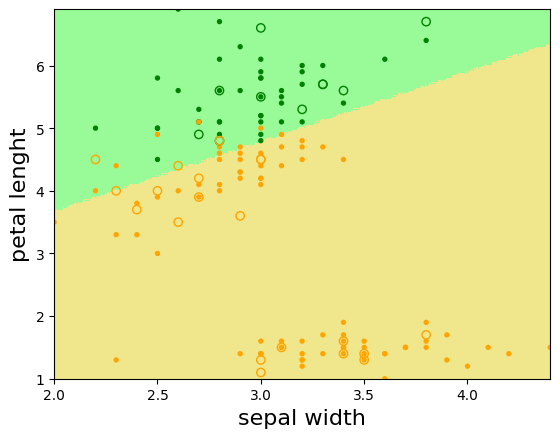

In [50]:
plt.contourf(x_grid, y_grid, z_grid, colors=['khaki', 'palegreen'])

colors = ["green" if y_train[i]==1 else "orange" for i in range(len(y_train))]
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, s=8)

colors = ["green" if y_test[i]==1 else "orange" for i in range(len(y_test))]
plt.scatter(X_test[:, 0], X_test[:, 1], edgecolors=colors, facecolors='none')

plt.xlabel("sepal width", fontsize=16)
plt.ylabel("petal lenght", fontsize=16)
# plt.show()

#### Решающая функция (Decision Function)
В случае бинарной классификации метод `decision_function()` возвращает уверенность в ответе (`confidence`), насколько далеко образец расположен от решающей границы. Если результат больше 0, то значит прогнозируется положительный класс, в противном случае - отрицательный.

In [51]:
index = 3
confidence = sgd_clf.decision_function([X_test[index]])
label = sgd_clf.predict([X_test[index]])
print(f"{X_test[index]}\n{confidence = }\n{label = }")

[3.8 6.7]
confidence = array([112.27270929])
label = array([1])


### Матрица неточностей (Confusion Matrix)
Для лучшей оценки модели классификации следует взглянуть на **матрицу неточностей** (*confusion matrix*). Получить матрицу неточностей можно воспользовавшись функцией [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), которая принимает в нкачестве аргументов фактические значения и прогнозные. Тогда каждая строка матрицы представляет фактический класс, а колонка - прогнозный класс. Первая строка (и первая колонка) - <span style="color: orange">"not virginica"</span>, вторая строка (и вторая колонка) - <span style="color: green">"virginica"</span>. 

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[72,  8],
       [ 1, 39]], dtype=int64)

[[72  8]
 [ 1 39]]


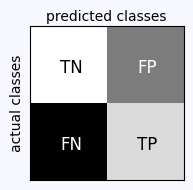

In [53]:
plt.figure(figsize=(2, 2), facecolor='ghostwhite', frameon=True)
plt.imshow(cm, cmap='gray', norm="log")
# plt.axis('off')
plt.text(-0.1, 0.1, 'TN', fontsize=12)
plt.text(0.9, 0.1, 'FP', c='white', fontsize=12)
plt.text(-0.1, 1.1, 'FN', c='white', fontsize=12)
plt.text(0.9, 1.1, 'TP', fontsize=12)
plt.ylabel('actual classes')
plt.xlabel('predicted classes')
plt.xticks([])
plt.yticks([])

ax = plt.gca()
ax.xaxis.set_label_position('top')

print(cm)

In [54]:
# Полная матрица неточностей
def full_confusion_matrix(y_true, y_pred, *args, **kwargs):
    cm = confusion_matrix(y_true, y_pred, *args, **kwargs)
    n = cm.shape[0]
    full_cm = np.zeros((n+1, n+1), dtype=np.int32)
    full_cm[:-1, :-1] += cm
    for i in range(n):
        full_cm[i, -1] = np.sum(cm[i, :])
        full_cm[-1, i] = np.sum(cm[:, i])
    full_cm[-1, -1] = np.sum(cm)
    return full_cm

full_cm = full_confusion_matrix(y_train, y_train_pred)
print(full_cm)

[[ 72   8  80]
 [  1  39  40]
 [ 73  47 120]]


#### Точность (Precision) и Полнота (Recall)

Введем еще пару обозначений:
- $Pos$ - общее число положительных образцов в выборке
- $Neg$ - общее число отрицательных образцов в выборке

**Recall** (*полнота*) характеризует, насколько полно классификатор идентифицирует все положительные образцов выборки. Recall равен 1, если для всех положительных образцов классификатор выдаст положительную метку ($TP=Pos$). . Иными словами Recall показывает, для какого процента положительных образцов классификатор выдал положительный результат.
$$
rec = \frac{TP}{TP + FN} = \frac{TP}{Pos}
$$
также recall (sensitivity) называют *отзывчивостью* или *чувствительностью* классификатора к положительному классу.

Обычно recall используется совместно с **precision** (*точность*), которая характеризует способность классификатора избегать ложно-положительных результатов. Precision равен доле истинно-положительных результатов от общего числа положительных результатов, т.е. говорит нам о том, в каком проценте случаев положительный прогноз оказывается корректным.
$$
prec = \frac{TP}{TP + FP}
$$
также precision называют **confidence** (*уверенность*).

Значения полноты и точности можно рассчитать из матрицы неточностей:

In [55]:
cm[1, 1] / (cm[1, 1] + cm[1, 0])    # полнота (recall)

0.975

In [56]:
cm[1, 1] / (cm[1, 1] + cm[0, 1])    # точность (precision)

0.8297872340425532

В модуле `metrics` есть функции, позволяющие посчитать полноту и точность:

In [57]:
from sklearn.metrics import recall_score, precision_score

recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
print(f"{recall = }\n{precision = }")

recall = 0.975
precision = 0.8297872340425532


In [58]:
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
print(f"{recall = }\n{precision = }")

recall = 1.0
precision = 0.7692307692307693


#### Метрика $F_1$ 
Вместо оценки двух метрик полноты и точности удобнее иметь одну метрику, которая отражает как полноту так и точность. Как вариант можно брать среднее арифметическое от полноты и точности $\frac{1}{2}(rec + prec)$. Но более надежной метрикой будет среднее гармоническое:
$$
F_1 = 2 \times \frac{rec \times prec}{rec + prec}
$$ 
В модуле `metrics` есть функция `f1_score`, позволяющая вычислить метрику $F_1$ 

In [59]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.896551724137931

In [60]:
f1_score(y_test, y_test_pred)

0.8695652173913044

На какую метрику следует полагаться при выборе оценки моделей? Это зависит от специфики задачи и данных. По умолчанию можно полагаться на метрику $F_1$.

### Обучение **не**линейной модели бинарной классификации
Обучим одну из разновидностей моделей, которые называются **машинами опорных векторов** (*Support Vector Machines* - SVM). В качестве решающей границы данная модель даст уже не прямую линию. По хорошему, для SVM необходимо всегда производить центрирование данных. Но сейчас мы обойдемся без этого.

In [61]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="poly")
svm_clf.fit(X_train, y_train)

SVC(kernel='poly')

#### Оценка верности модели

In [62]:
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"{train_acc = :.2}\n{test_acc = :.2}")

train_acc = 0.95
test_acc = 0.97


#### Визуализация решающей границы

In [63]:
import numpy as np

x_min, y_min = np.min(X_reduced, axis=0)
x_max, y_max = np.max(X_reduced, axis=0)

resolution = 200

x_values = np.linspace(x_min, x_max, resolution)
y_values = np.linspace(y_min, y_max, resolution)
x_grid, y_grid = np.meshgrid(x_values, y_values)

z_grid = np.zeros_like(x_grid, dtype=np.int8)

for i in range(resolution):
    for j in range(resolution):
        instance = np.array([[x_grid[i, j], y_grid[i, j]]])
        z_grid[i, j] = svm_clf.predict(instance)

Text(0, 0.5, 'petal lenght')

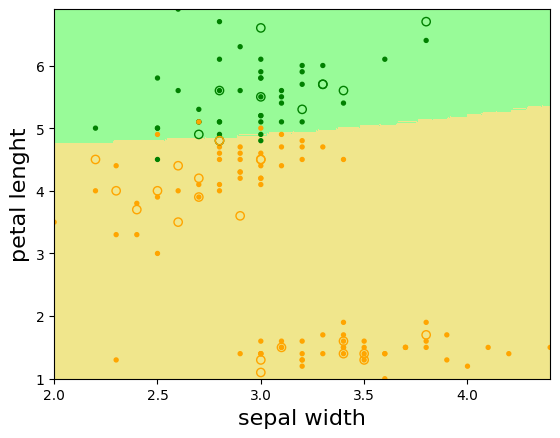

In [64]:
plt.contourf(x_grid, y_grid, z_grid, colors=['khaki', 'palegreen'])

colors = ["green" if y_train[i]==1 else "orange" for i in range(len(y_train))]
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, s=8)

colors = ["green" if y_test[i]==1 else "orange" for i in range(len(y_test))]
plt.scatter(X_test[:, 0], X_test[:, 1], edgecolors=colors, facecolors='none')

plt.xlabel("sepal width", fontsize=16)
plt.ylabel("petal lenght", fontsize=16)
# plt.ylim([4.5, 5.5])

#### Матрица неточностей

In [65]:
confusion_matrix(y_train, y_train_pred)

array([[77,  3],
       [ 3, 37]], dtype=int64)

#### Полнота и точность

In [66]:
recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
print(f"{recall = }\n{precision = }")

recall = 0.925
precision = 0.925


#### Метрика $F_1$

In [67]:
f1_score(y_train, y_train_pred)

0.925

## Многоклассовая классификация (Multiclass Classification)
Вернемся к исходному набору данных, в которых классов представлено 3, а нецелевых признаков - 4. Классификация, при котором число классов больше двух называется **многоклассовой классификацией**. Некоторые алгоритмы, такие как рассмотренный SGD classifier или решающие деревья, поддерживают многоклассовую классификацию, в то время как SVM классификатор, логистическая регрессия и др. являются строго бинарными классификаторами. Однако есть различные стратегии, позволяющие производить многоклассовую классификацию с несколькими бинарными классификаторами. 

В частности, для классификации ирисов можно использовать 3 бинарных классификатора, каждый из которых регистрирует один вид ириса. Для классификации будет использоваться *уверенность* от всех классификаторов (возвращаемое методом `decision_function()`) и прогнозом будет тот класс, чей бинарный классификатор дал наибольшую уверенность. Такая стратегия называется **один-против-остальных** (*one-versus-the-rest* - OvR, также называется *one-versus-all*).

Другая стретегия - **один-против-одного** (*one-versus-one* - OvO) предполгает обучение бинарых классификаторов для каждой пары классов: один классификатор учится различать setosa и versicolor, другой - cetosa и virginica, а третий - versisolor и virginica. Если классов $N$, то необходимо обучить $N \times (N - 1) / 2$ классификаторов. Для ирисов потребуется всего 3 бинарных классификаторов,а вот для распознавания, к примеру, цифр ($N=10$) потребуется 45 бинарных классификаторов. Для классификации ирисов придется запустить все 3 классификатора и увидеть, какой класс выигрывает в большинстве дуэлей. Преимуществом OvO стратегии является то, что каждый классификатор требуется обучить только для части тренировочного набора, содержащего два класса.

Scikit-Learn при попытке обучить бинарный классификатор для многоклассовой классификации автоматически запускает OvR или OvO (в зависимости от используемого алгоритма бинарной классификации).

#### Разбиение на тренировочную и тестовую выборки

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=40)

X_train.shape, y_train.shape

((120, 4), (120,))

### Обучение линейного классификатора

In [69]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

SGDClassifier()

#### Оценка многоклассовго классификатора
Есть несколько способов для оценки многометочного классификатора. Можно оценить верность (accuracy):

In [70]:
from sklearn.metrics import accuracy_score

y_train_pred = sgd_clf.predict(X_train)
y_test_pred = sgd_clf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"{train_acc = :.2}\n{test_acc = :.2}")

train_acc = 0.93
test_acc = 0.93


In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[41,  1,  0],
       [ 0, 38,  0],
       [ 0,  8, 32]], dtype=int64)

Другой способ заключается в измерении метрики $F_1$ для каждой отдельной метки (или любых других метрик бинарной классификации) и простого усреднения по всем меткам. Для этого следует задать значение аргумента `average="macro"` в функциях `f1_score()`, `recall_score()` или `precision_score()`:

In [72]:
from sklearn.metrics import recall_score, precision_score

recall = recall_score(y_train, y_train_pred, average="macro")
precision = precision_score(y_train, y_train_pred, average="macro")
print(f"Train:\n{recall = }\n{precision = }")

Train:
recall = 0.9253968253968253
precision = 0.9361702127659575


In [73]:
recall = recall_score(y_test, y_test_pred, average="macro")
precision = precision_score(y_test, y_test_pred, average="macro")
print(f"Test:\n{recall = }\n{precision = }")

Test:
recall = 0.9333333333333332
precision = 0.9523809523809524


In [74]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred, average="macro")

0.9236527810588759

Такой способ предполагает равную важность всех меток, что не всегда так. Если мы хотим придать больше важности той метке, для которой число положительных образцов больше, то можно задаться `average="weighted"`.

### Обучение **не**линейного классификатора

In [75]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="poly")
svm_clf.fit(X_train, y_train)

SVC(kernel='poly')

In [76]:
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"{train_acc = :.2}\n{test_acc = :.2}")

train_acc = 0.97
test_acc = 1.0


In [77]:
confusion_matrix(y_train, y_train_pred)

array([[42,  0,  0],
       [ 0, 35,  3],
       [ 0,  0, 40]], dtype=int64)

In [78]:
recall = recall_score(y_train, y_train_pred, average="macro")
precision = precision_score(y_train, y_train_pred, average="macro")
print(f"{recall = }\n{precision = }")

recall = 0.9736842105263158
precision = 0.9767441860465116


In [79]:
f1_score(y_train, y_train_pred, average="macro")

0.9742531770919293

#### Визуализация многомерной классификации с двумя признаками
На этот раз обучим модель логистической регрессии на упрощенных данных признаков `X_reduced`, созданных в самом начале, однако в качестве меток будет использован массив исходный `y`, в котором представлены все три класса.

In [80]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_reduced, y)

LogisticRegression()

In [81]:
svm = SVC(kernel="poly")
svm.fit(X_reduced, y)

SVC(kernel='poly')

Text(0, 0.5, 'petal lenght')

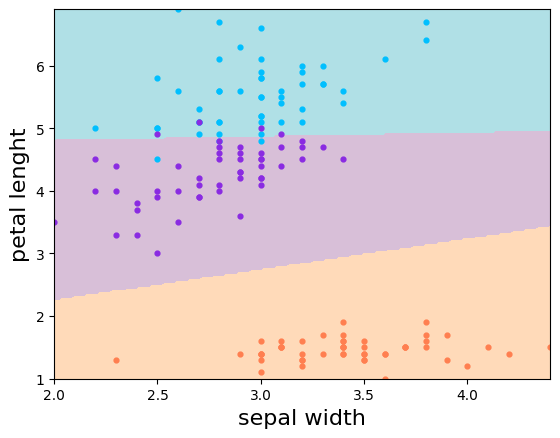

In [82]:
x_min, y_min = np.min(X_reduced, axis=0)
x_max, y_max = np.max(X_reduced, axis=0)

resolution = 200

x_values = np.linspace(x_min, x_max, resolution)
y_values = np.linspace(y_min, y_max, resolution)
x_grid, y_grid = np.meshgrid(x_values, y_values)

z_grid = np.zeros_like(x_grid)

for i in range(resolution):
    for j in range(resolution):
        instance = np.array([[x_grid[i, j], y_grid[i, j]]])
        z_grid[i, j] = logistic.predict(instance)
        # z_grid[i, j] = svm.predict(instance)

plt.contourf(x_grid, y_grid, z_grid, levels=2, 
             colors=['peachpuff', 'thistle', 'powderblue'])

X_setosa = X_reduced[y == 0]
X_versicolor = X_reduced[y == 1]
X_virginica = X_reduced[y == 2]

plt.scatter(X_virginica[:, 0], X_virginica[:, 1], c="deepskyblue", s=12)
plt.scatter(X_versicolor[:, 0], X_versicolor[:, 1], c="blueviolet", s=12)
plt.scatter(X_setosa[:, 0], X_setosa[:, 1], c="coral", s=12)

plt.xlabel("sepal width", fontsize=16)
plt.ylabel("petal lenght", fontsize=16)